In [1]:
import matplotlib.pyplot as plt
from PIL import Image

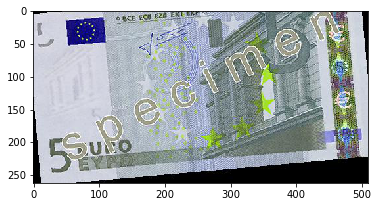

In [2]:
img_0 = Image.open('/resources/data/train_data_keras/5/0.jpeg')
plt.imshow(img_0)

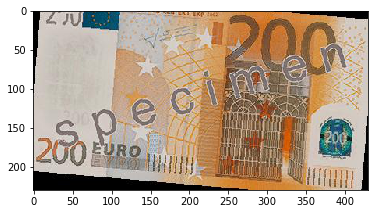

In [3]:
img_52 = Image.open('/resources/data/train_data_keras/200/52.jpeg')
plt.imshow(img_52)

In [4]:
import keras
from keras.layers import Dense
from keras.models import Model
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import preprocess_input, decode_predictions

Using TensorFlow backend.


In [5]:
import os
import pandas as pd
import numpy as np 
import random
from imageio import imread
from matplotlib.pyplot import imshow
from PIL import ImageDraw, ImageFont

In [6]:
TARGET_SIZE = (224, 224)
BATCH_SIZE = 2
CLASSES = ['5', '10', '20', '50', '100', '200', '500']
RANDOM_SEED = 0

In [7]:
train_data_dir = '/resources/data/train_data_keras'

In [8]:
train_generator = ImageDataGenerator().flow_from_directory(train_data_dir
                                                           , target_size=TARGET_SIZE
                                                           , batch_size=BATCH_SIZE
                                                           , classes=CLASSES
                                                           , seed=RANDOM_SEED
                                                           , shuffle=True)

Found 70 images belonging to 7 classes.


In [9]:
validation_data_dir = '/resources/data/validation_data_keras'

In [10]:
valid_generator = ImageDataGenerator().flow_from_directory(validation_data_dir
                                                           , target_size=TARGET_SIZE
                                                           , batch_size=BATCH_SIZE
                                                           , classes=CLASSES
                                                           , seed=RANDOM_SEED
                                                           , shuffle=True)

Found 70 images belonging to 7 classes.


In [11]:
model = ResNet50(weights='imagenet')

In [12]:
for layer in model.layers:
    layer.trainable= False

In [13]:
sec_last_model = model.layers[-2].output
connected_model = Dense(len(CLASSES), activation = 'softmax')(sec_last_model)
model_input = model.input
model = Model(inputs = model.input, outputs = connected_model)

In [14]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [15]:
N_EPOCHES = 50
STEPS = train_generator.n // train_generator.batch_size
model.fit_generator(generator = train_generator, validation_data = valid_generator, steps_per_epoch = STEPS, epochs = N_EPOCHES)

Epoch 1/50
35/35 [==============================] - 40s 1s/step - loss: 2.0030 - acc: 0.2429 - val_loss: 2.1024 - val_acc: 0.2429
Epoch 2/50
35/35 [==============================] - 38s 1s/step - loss: 1.1164 - acc: 0.7429 - val_loss: 1.5804 - val_acc: 0.3571
Epoch 3/50
35/35 [==============================] - 38s 1s/step - loss: 0.6672 - acc: 0.8857 - val_loss: 1.3818 - val_acc: 0.4286
Epoch 4/50
35/35 [==============================] - 39s 1s/step - loss: 0.5299 - acc: 0.9143 - val_loss: 1.4100 - val_acc: 0.3714
Epoch 5/50
35/35 [==============================] - 37s 1s/step - loss: 0.2503 - acc: 0.9714 - val_loss: 0.8889 - val_acc: 0.7286
Epoch 6/50
35/35 [==============================] - 38s 1s/step - loss: 0.5113 - acc: 0.8857 - val_loss: 1.1665 - val_acc: 0.6143
Epoch 7/50
35/35 [==============================] - 37s 1s/step - loss: 0.3902 - acc: 0.9000 - val_loss: 1.0355 - val_acc: 0.5857
Epoch 8/50
35/35 [==============================] - 37s 1s/step - loss: 0.3403 - acc: 0.91

In [16]:
train_history = model.history.history

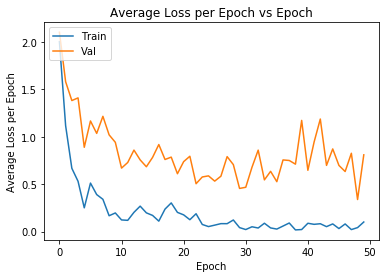

In [17]:
plt.plot(train_history['loss'])
plt.plot(train_history['val_loss'])
plt.title('Average Loss per Epoch vs Epoch')
plt.ylabel('Average Loss per Epoch')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

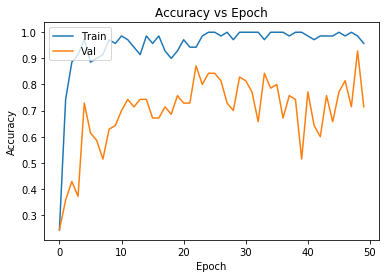

In [18]:
plt.plot(train_history['acc'])
plt.plot(train_history['val_acc'])
plt.title('Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [19]:
model.save("/resources/Proyectos/Rentadrone/resnet50_keras.pt")